In [1]:
# Dependencies
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error,r2_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import csv
datafile = "Resources/IowaCleanData.csv"
df = pd.read_csv(datafile)
df.head()


,Lot Frontage,Lot Area,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,...,Gr Liv Area,Full Bath,Half Bath,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,SalePrice
0,141.0,31770,6,1960,1960,112.0,639.0,441.0,1080.0,1656,...,1656,1,0,7,2,2.0,528.0,210,62,215000
1,80.0,11622,5,1961,1961,0.0,468.0,270.0,882.0,896,...,896,1,0,5,0,1.0,730.0,140,0,105000
2,81.0,14267,6,1958,1958,108.0,923.0,406.0,1329.0,1329,...,1329,1,1,6,0,1.0,312.0,393,36,172000
3,93.0,11160,7,1968,1968,0.0,1065.0,1045.0,2110.0,2110,...,2110,2,1,8,2,2.0,522.0,0,0,244000
4,74.0,13830,5,1997,1998,0.0,791.0,137.0,928.0,928,...,1629,2,1,6,1,2.0,482.0,212,34,189900


In [3]:
df.columns

Index(['Lot Frontage', 'Lot Area', 'Overall Qual', 'Year Built',
       'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Full Bath',
       'Half Bath', 'TotRms AbvGrd', 'Fireplaces', 'Garage Cars',
       'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'SalePrice'],
      dtype='object')

In [4]:
# Split into train/test
X = df[['Lot Frontage', 'Lot Area', 'Overall Qual', 'Year Built','Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'Bsmt Unf SF','Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Full Bath','Half Bath', 'TotRms AbvGrd', 'Fireplaces', 'Garage Cars','Garage Area', 'Wood Deck SF', 'Open Porch SF']]
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2197, 20), (733, 20), (2197,), (733,))

In [5]:
# Multiple Linear Regression model

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

MSE = mean_squared_error(y_test, predictions)

r2 = r2_score(y_test, predictions)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1225220757.8794043, R2: 0.8319330212616827


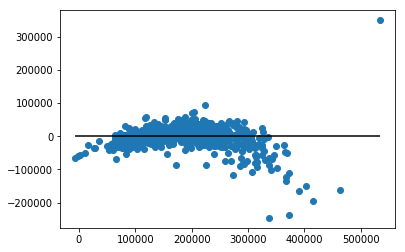

In [6]:
# Multiple Linear Regression model

# Plot Residuals

plt.scatter(predictions, predictions - y_test)

plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())

plt.savefig('Images/Multiple Linear Regression')

plt.show()

In [7]:
# plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")

# plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")

# plt.legend()

# plt.hlines(y=0, xmin=y.min(), xmax=y.max())

# plt.title("Residual Plot")


In [8]:
# Ridge model

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.01).fit(X_train, y_train)

predictions = ridge.predict(X_test)

MSE = mean_squared_error(y_test, predictions)

r2 = ridge.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1225219302.7043579, R2: 0.8319332208721383


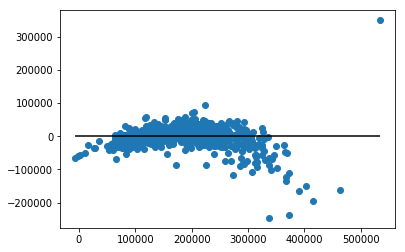

In [9]:
# Ridge model

# Plot Residuals

plt.scatter(predictions, predictions - y_test)

plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())

plt.savefig('Images/Ridge')

plt.show()

In [10]:
# LASSO model

from sklearn.linear_model import Lasso

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=Y)

lasso = Lasso(alpha=.01).fit(X_train, y_train)

predictions = lasso.predict(X_test)

MSE = mean_squared_error(y_test, predictions)

r2 = lasso.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1225222762.3354769, R2: 0.8319327463048033


C:\Users\kamrk\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


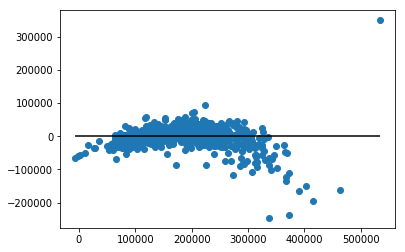

In [11]:
# LASSO model

# Plot Residuals

plt.scatter(predictions, predictions - y_test)

plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())

plt.savefig('Images/LASSO')

plt.show()

In [12]:
# ElasticNet model

from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01).fit(X_train, y_train)

predictions = elasticnet.predict(X_test)

MSE = mean_squared_error(y_test, predictions)

r2 = elasticnet.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1223744529.6377602, R2: 0.8321355196432239


C:\Users\kamrk\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


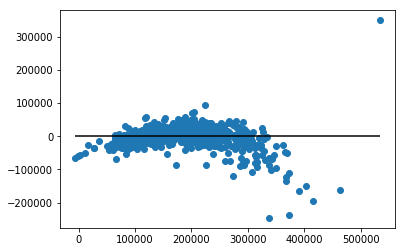

In [13]:
# ElasticNet model

# Plot Residuals

plt.scatter(predictions, predictions - y_test)

plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())

plt.savefig('Images/ElasticNet')

plt.show()